In [1]:
import numpy as np
import matplotlib.pyplot
import pandas as pd 

In [9]:
df = pd.read_csv("housing.csv")

In [10]:
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1978,-120.32,38.71,13.0,1115.0,255.0,86.0,32.0,3.5667,115600.0,INLAND
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0,INLAND
6571,-118.15,34.19,48.0,1854.0,360.0,1126.0,382.0,3.2216,161600.0,<1H OCEAN
19089,-122.61,38.24,25.0,2990.0,450.0,1335.0,434.0,4.7000,190100.0,<1H OCEAN
4074,-118.43,34.14,44.0,1693.0,239.0,498.0,216.0,10.9237,500001.0,<1H OCEAN
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
10186,-117.95,33.87,35.0,1854.0,383.0,1115.0,381.0,4.4784,185200.0,<1H OCEAN
14064,-117.12,32.75,15.0,2671.0,724.0,1800.0,646.0,2.1394,106700.0,NEAR OCEAN
5257,-118.49,34.06,42.0,2861.0,360.0,829.0,310.0,15.0001,500001.0,<1H OCEAN
5989,-117.72,34.10,46.0,2477.0,458.0,1034.0,455.0,5.5000,289700.0,INLAND


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df.shape

(20640, 10)

In [13]:
df.size

206400

In [14]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [16]:
housing_new = df.drop(columns=['ocean_proximity'])

In [ ]:
housing_new = housing.drop(columns=['ocean_proximity'])

In [17]:
housing_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [19]:
corr_matrix = housing_new.corr()
# check the correlation in descending order
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [21]:
housing_new.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [22]:
housing = df 

In [23]:
# creating own features and  check whether its correlation
housing_new["rooms_per_household"] = housing_new["total_rooms"]/housing_new["households"]
housing_new["bedrooms_per_room"] = housing_new["total_bedrooms"]/housing_new["total_rooms"]
housing_new["population_per_household"]=housing_new["population"]/housing_new["households"]


# checking over the correlation of median house price with other features
corr_matrix = housing_new.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [24]:
housing_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209


In [25]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_cat = housing[["ocean_proximity"]]

In [30]:
# Define the target and features
X = housing.drop('median_house_value', axis=1)  # Features (exclude target)
y = housing['median_house_value']  # Target

In [33]:
X.shape

(20640, 9)

In [34]:
y.shape

(20640,)

In [36]:
# Define numerical and categorical columns
housing_num = X.select_dtypes(include=['float64', 'int64']).columns
housing_cat = X.select_dtypes(include=['object']).columns

# Print out the column names to verify
print("Numerical columns:\n", housing_num)
print("Categorical columns:\n", housing_cat)

Numerical columns:
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
Categorical columns:
 Index(['ocean_proximity'], dtype='object')


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer

## Define the numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Scale the numerical features
])

# Define the categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, housing_num),  # Apply num_pipeline to numerical columns
    ('cat', cat_pipeline, housing_cat)   # Apply cat_pipeline to categorical columns
])

In [39]:
# Apply the transformation to the features (X)
X_transformed = preprocessor.fit_transform(X)

# Convert the result into a DataFrame (optional for better readability)
# Get the transformed column names for both numerical and categorical data
num_columns = housing_num
cat_columns = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(housing_cat)

# Combine column names and create a new DataFrame for the transformed data
all_columns = list(num_columns) + list(cat_columns)
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)

# Display the transformed dataset
print(X_transformed_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0   -0.974429   -0.977033       2.344766                        0.0   
1    0.861439    1.669961       2.332238                        0.0   
2   -0.820777   -0.843637       1.782699                        0.0   
3   -0.766028   -0.733781       0.932968                        0.0   
4   -0.759847   -0.629157      -0.012881                        0.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                  

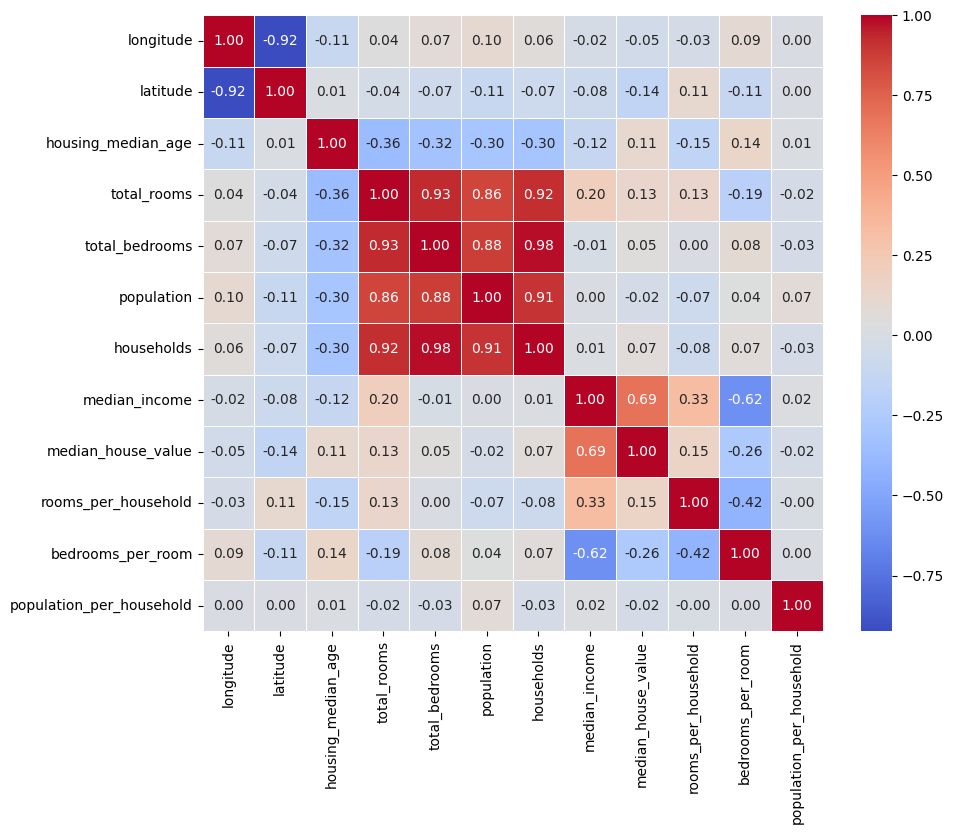

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = housing_new.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print(to_drop)

In [41]:
X = X_transformed_df

from sklearn.linear_model import LassoCV 
from sklearn.model_selection import train_test_split
# Create a LassoCV model
lasso = LassoCV(cv=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the model to the training data
lasso.fit(X_train, y_train)


# Print the best alpha value chosen by cross-validation
print(f"Best alpha: {lasso.alpha_}")
# Get the features selected by Lasso
selected_features = X.columns[lasso.coef_ != 0]
print(f"Selected features: {selected_features}")

Best alpha: 80.0394442061082
Selected features: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')
